In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
df1 = pd.read_csv('Us_Ecommerce_Dataset.csv')

In [4]:
df1.head()

,Transaction_id,customer_id,Date,Product,Gender,Device_Type,Country,State,City,Category,Customer_Login_type,Delivery_Type,Quantity,Transaction Start,Transaction_Result,Amount US$,Individual_Price_US$,Year_Month,Time
0,40170,1348959766,14/11/2013,Hair Band,Female,Web,United States,New York,New York City,Accessories,Member,one-day deliver,12,1,0,"6,910",576,13-Nov,22:35:51
1,33374,2213674919,05/11/2013,Hair Band,Female,Web,United States,California,Los Angles,Accessories,Member,one-day deliver,17,1,1,"1,699",100,13-Nov,06:44:41
2,14407,1809450308,01/10/2013,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,1,0,"4,998",217,13-Oct,00:41:24
3,15472,1691227134,04/10/2013,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,1,0,736,32,13-Oct,22:04:03
4,18709,2290737237,12/10/2013,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,1,1,"4,389",191,13-Oct,15:00:46


# 전처리

In [5]:
# 의미를 알 수 없는 칼럼 삭제

df1 = df1.drop(['Transaction Start', 'Transaction_Result'], axis = 1)

In [6]:
df1

,Transaction_id,customer_id,Date,Product,Gender,Device_Type,Country,State,City,Category,Customer_Login_type,Delivery_Type,Quantity,Amount US$,Individual_Price_US$,Year_Month,Time
0,40170,1348959766,14/11/2013,Hair Band,Female,Web,United States,New York,New York City,Accessories,Member,one-day deliver,12,"6,910",576,13-Nov,22:35:51
1,33374,2213674919,05/11/2013,Hair Band,Female,Web,United States,California,Los Angles,Accessories,Member,one-day deliver,17,"1,699",100,13-Nov,06:44:41
2,14407,1809450308,01/10/2013,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,"4,998",217,13-Oct,00:41:24
3,15472,1691227134,04/10/2013,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,736,32,13-Oct,22:04:03
4,18709,2290737237,12/10/2013,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,"4,389",191,13-Oct,15:00:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,67031,1266148699,13/12/2013,Shoes,Female,Mobile,United States,Washington,Seattle,wearables,Member,Normal Delivery,20,"5,895",295,13-Dec,19:18:50
65531,67043,2282461907,13/12/2013,Shoes,Female,Mobile,United States,Washington,Seattle,wearables,Member,Normal Delivery,16,299,19,13-Dec,18:18:05
65532,67045,1367012613,13/12/2013,Shoes,Female,Mobile,United States,Washington,Seattle,wearables,Member,Normal Delivery,23,"21,990",956,13-Dec,20:13:22
65533,67150,1192845373,13/12/2013,Shoes,Female,Mobile,United States,Washington,Seattle,wearables,Member,Normal Delivery,22,"8,680",395,13-Dec,10:39:28


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Transaction_id        65535 non-null  int64 
 1   customer_id           65535 non-null  int64 
 2   Date                  65535 non-null  object
 3   Product               65535 non-null  object
 4   Gender                65535 non-null  object
 5   Device_Type           65535 non-null  object
 6   Country               65535 non-null  object
 7   State                 65535 non-null  object
 8   City                  65535 non-null  object
 9   Category              65535 non-null  object
 10  Customer_Login_type   65535 non-null  object
 11  Delivery_Type         65535 non-null  object
 12   Quantity             65535 non-null  int64 
 13  Amount US$            65534 non-null  object
 14  Individual_Price_US$  65535 non-null  object
 15  Year_Month            65535 non-null

In [8]:
# 잘못 된 컬럼명 삭제 (띄어쓰기)
df1.rename({' Quantity ': 'Quantity'}, axis=1, inplace=True)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Transaction_id        65535 non-null  int64 
 1   customer_id           65535 non-null  int64 
 2   Date                  65535 non-null  object
 3   Product               65535 non-null  object
 4   Gender                65535 non-null  object
 5   Device_Type           65535 non-null  object
 6   Country               65535 non-null  object
 7   State                 65535 non-null  object
 8   City                  65535 non-null  object
 9   Category              65535 non-null  object
 10  Customer_Login_type   65535 non-null  object
 11  Delivery_Type         65535 non-null  object
 12  Quantity              65535 non-null  int64 
 13  Amount US$            65534 non-null  object
 14  Individual_Price_US$  65535 non-null  object
 15  Year_Month            65535 non-null

In [10]:
# 형변환 (1)
# 컬럼 'Amount US$' 값을 계산할 수 있게 숫자 사이에 있는 ',' 콤마 제거하기
# 컬럼 'Individual_Price_US$' ',' 콤마 제거하가

df1['Amount US$'] = df1['Amount US$'].str.replace(',', '')
df1['Individual_Price_US$'] = df1['Individual_Price_US$'].str.replace(',','')

In [11]:
# 형변환(2)
# fillna(-1) 함수 사용해서 nan값 제거하기

df1["Amount US$"] = df1["Amount US$"].fillna(-1)

In [12]:
# 형변환(3)

df1["Amount US$"].astype(int)

0         6910
1         1699
2         4998
3          736
4         4389
         ...  
65530     5895
65531      299
65532    21990
65533     8680
65534    30901
Name: Amount US$, Length: 65535, dtype: int64

In [13]:
df1['Individual_Price_US$'] = df1['Individual_Price_US$'].fillna(-1)

In [14]:
df1[df1["Individual_Price_US$"] == "#VALUE!"]

,Transaction_id,customer_id,Date,Product,Gender,Device_Type,Country,State,City,Category,Customer_Login_type,Delivery_Type,Quantity,Amount US$,Individual_Price_US$,Year_Month,Time
192,30382,1550737263,31/10/2013,Shirt,Male,Web,United States,New York,New York City,Clothing,Member,one-day deliver,17,161850,#VALUE!,13-Oct,16:05:37
298,35816,1225531606,09/11/2013,Shirt,Male,Web,United States,New York,New York City,Clothing,Member,one-day deliver,13,126834,#VALUE!,13-Nov,12:47:28
508,45944,2236204604,22/11/2013,Shirt,Male,Web,United States,New York,New York City,Clothing,Member,one-day deliver,20,133934,#VALUE!,13-Nov,20:28:15
946,68232,1608443721,14/12/2013,Shirt,Male,Web,United States,New York,New York City,Clothing,Member,one-day deliver,20,160000,#VALUE!,13-Dec,09:07:10
1148,79559,1902455585,26/12/2013,Shirt,Male,Web,United States,New York,New York City,Clothing,Member,one-day deliver,21,122900,#VALUE!,13-Dec,18:16:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64264,39380,1216069884,13/11/2013,Shoes,Female,Mobile,United States,Washington,Seattle,wearables,Member,Normal Delivery,19,117775,#VALUE!,13-Nov,11:06:13
64456,43484,1800956770,19/11/2013,Shoes,Female,Mobile,United States,Washington,Seattle,wearables,Member,Normal Delivery,12,358500,#VALUE!,13-Nov,14:56:39
64828,50814,1543861731,29/11/2013,Shoes,Female,Mobile,United States,Washington,Seattle,wearables,Member,Normal Delivery,18,346471,#VALUE!,13-Nov,14:11:49
65078,55380,1707492787,02/12/2013,Shoes,Female,Mobile,United States,Washington,Seattle,wearables,Member,one-day deliver,13,206439,#VALUE!,13-Dec,18:21:32


In [15]:
# VALUE!'값이 있는 index를 'idx'에 저장 후 삭제
# 5% 미만이라 삭제 결정
idx = df1["Individual_Price_US$"][df1["Individual_Price_US$"] == "#VALUE!"].index

In [16]:
df1.drop(idx, axis=0, inplace=True)

In [17]:
df1[df1["Individual_Price_US$"] == "#VALUE!"]

,Transaction_id,customer_id,Date,Product,Gender,Device_Type,Country,State,City,Category,Customer_Login_type,Delivery_Type,Quantity,Amount US$,Individual_Price_US$,Year_Month,Time


In [18]:
df1["Individual_Price_US$"].astype(float)

0         576.0
1         100.0
2         217.0
3          32.0
4         191.0
          ...  
65530     295.0
65531      19.0
65532     956.0
65533     395.0
65534    1931.0
Name: Individual_Price_US$, Length: 65376, dtype: float64

In [19]:
df1

,Transaction_id,customer_id,Date,Product,Gender,Device_Type,Country,State,City,Category,Customer_Login_type,Delivery_Type,Quantity,Amount US$,Individual_Price_US$,Year_Month,Time
0,40170,1348959766,14/11/2013,Hair Band,Female,Web,United States,New York,New York City,Accessories,Member,one-day deliver,12,6910,576,13-Nov,22:35:51
1,33374,2213674919,05/11/2013,Hair Band,Female,Web,United States,California,Los Angles,Accessories,Member,one-day deliver,17,1699,100,13-Nov,06:44:41
2,14407,1809450308,01/10/2013,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,4998,217,13-Oct,00:41:24
3,15472,1691227134,04/10/2013,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,736,32,13-Oct,22:04:03
4,18709,2290737237,12/10/2013,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,4389,191,13-Oct,15:00:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,67031,1266148699,13/12/2013,Shoes,Female,Mobile,United States,Washington,Seattle,wearables,Member,Normal Delivery,20,5895,295,13-Dec,19:18:50
65531,67043,2282461907,13/12/2013,Shoes,Female,Mobile,United States,Washington,Seattle,wearables,Member,Normal Delivery,16,299,19,13-Dec,18:18:05
65532,67045,1367012613,13/12/2013,Shoes,Female,Mobile,United States,Washington,Seattle,wearables,Member,Normal Delivery,23,21990,956,13-Dec,20:13:22
65533,67150,1192845373,13/12/2013,Shoes,Female,Mobile,United States,Washington,Seattle,wearables,Member,Normal Delivery,22,8680,395,13-Dec,10:39:28


In [20]:
df1['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%Y')
df1['Time'] = pd.to_datetime(df1['Time'])

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65376 entries, 0 to 65534
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Transaction_id        65376 non-null  int64         
 1   customer_id           65376 non-null  int64         
 2   Date                  65376 non-null  datetime64[ns]
 3   Product               65376 non-null  object        
 4   Gender                65376 non-null  object        
 5   Device_Type           65376 non-null  object        
 6   Country               65376 non-null  object        
 7   State                 65376 non-null  object        
 8   City                  65376 non-null  object        
 9   Category              65376 non-null  object        
 10  Customer_Login_type   65376 non-null  object        
 11  Delivery_Type         65376 non-null  object        
 12  Quantity              65376 non-null  int64         
 13  Amount US$      

In [22]:
df1.head()

,Transaction_id,customer_id,Date,Product,Gender,Device_Type,Country,State,City,Category,Customer_Login_type,Delivery_Type,Quantity,Amount US$,Individual_Price_US$,Year_Month,Time
0,40170,1348959766,2013-11-14,Hair Band,Female,Web,United States,New York,New York City,Accessories,Member,one-day deliver,12,6910,576,13-Nov,2022-12-16 22:35:51
1,33374,2213674919,2013-11-05,Hair Band,Female,Web,United States,California,Los Angles,Accessories,Member,one-day deliver,17,1699,100,13-Nov,2022-12-16 06:44:41
2,14407,1809450308,2013-10-01,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,4998,217,13-Oct,2022-12-16 00:41:24
3,15472,1691227134,2013-10-04,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,736,32,13-Oct,2022-12-16 22:04:03
4,18709,2290737237,2013-10-12,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,4389,191,13-Oct,2022-12-16 15:00:46


In [23]:
pd.options.display.max_columns = 200
pd.options.display.max_info_columns = 200

In [24]:
df1['month'] = df1['Date'].dt.month
df1['year'] = df1['Date'].dt.year
df1['hour'] = df1['Time'].dt.hour
df1['weekday_name'] = df1['Date'].dt.day_name()

In [25]:
df1.head()

,Transaction_id,customer_id,Date,Product,Gender,Device_Type,Country,State,City,Category,Customer_Login_type,Delivery_Type,Quantity,Amount US$,Individual_Price_US$,Year_Month,Time,month,year,hour,weekday_name
0,40170,1348959766,2013-11-14,Hair Band,Female,Web,United States,New York,New York City,Accessories,Member,one-day deliver,12,6910,576,13-Nov,2022-12-16 22:35:51,11,2013,22,Thursday
1,33374,2213674919,2013-11-05,Hair Band,Female,Web,United States,California,Los Angles,Accessories,Member,one-day deliver,17,1699,100,13-Nov,2022-12-16 06:44:41,11,2013,6,Tuesday
2,14407,1809450308,2013-10-01,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,4998,217,13-Oct,2022-12-16 00:41:24,10,2013,0,Tuesday
3,15472,1691227134,2013-10-04,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,736,32,13-Oct,2022-12-16 22:04:03,10,2013,22,Friday
4,18709,2290737237,2013-10-12,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,4389,191,13-Oct,2022-12-16 15:00:46,10,2013,15,Saturday


# 시각화

### 성별거래건수

In [26]:
sns.set_palette("Paired")

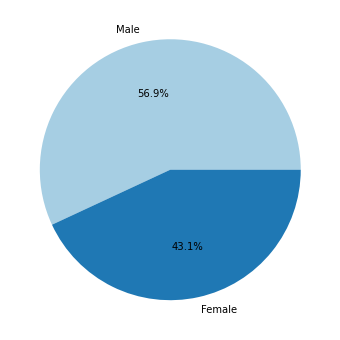

In [27]:
counts = df1['Gender'].value_counts()

plt.figure(figsize = (6, 6))
plt.pie(counts.values, labels = counts.index, autopct='%.1f%%')
plt.show()

### 거래건수 TOP8 상품

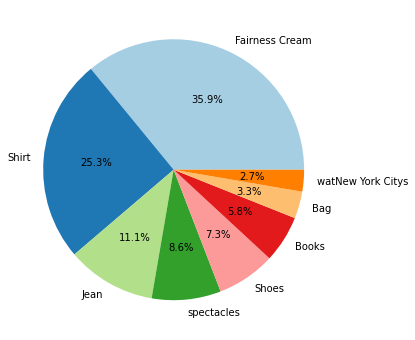

In [28]:
df4 = df1['Product'].value_counts()
df4 = df4.reset_index().loc[:7].rename(columns={"index": "Product", "Product": "Count"})

plt.figure(figsize=(6, 6))
plt.pie(df4["Count"].values, labels=df4["Product"].values, autopct="%1.1f%%")
plt.show()

### 시간별매출

In [29]:
# 확인해봐야함.
df2 = df1.groupby('hour').sum().sort_values('hour')
df2 = df2.reset_index().rename(columns={'index':'hour'})
df2

,hour,Transaction_id,customer_id,Quantity,month,year
0,0,122020174,4773726929142,47257,29027,5549956
1,1,117254794,4682839431267,46453,28407,5455343
2,2,117360429,4626584061029,46060,28296,5435216
3,3,119184398,4680693459679,46182,28290,5435224
4,4,116865129,4694304898405,46611,28346,5449306
5,5,117621965,4668845268096,46249,28309,5447295
6,6,119351800,4607458954562,45932,28062,5392954
7,7,120440624,4715228480973,46855,28616,5487556
8,8,122841415,4841680247059,47805,29202,5628480
9,9,123550535,4827603587885,47605,29056,5590235


In [30]:
# 확인해봐야함
plt.figure(figsize=(20, 3))
plt.plot(df2['hour'], df2['Amount US$'], "ro--", label="Amount US$")
plt.legend()
plt.show()

KeyError: 'Amount US$'

<Figure size 1440x216 with 0 Axes>

### 시간별 거래 건수

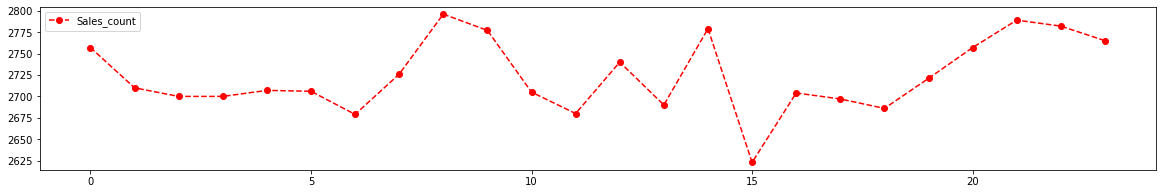

In [31]:
df3 = df1.groupby('hour').count().sort_values('hour') 
df3 = df3.reset_index().rename(columns={'index':'hour'})

plt.figure(figsize=(20, 3))
plt.plot(df3['hour'], df3['Amount US$'], "ro--", label="Sales_count")
plt.legend()
plt.show()

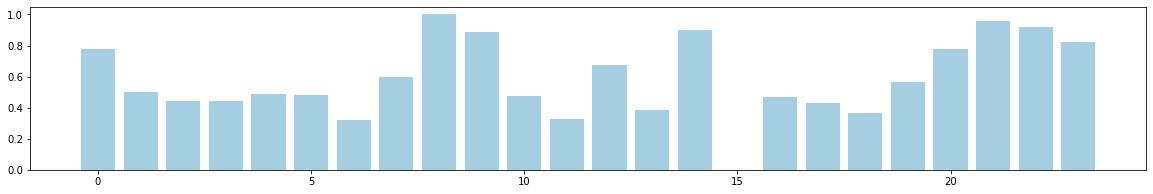

In [32]:
from sklearn.preprocessing import minmax_scale
plt.figure(figsize=(20, 3))
plt.bar(df3['hour'], minmax_scale(df3['Amount US$']))
plt.show()

### 월별 거래 빈도

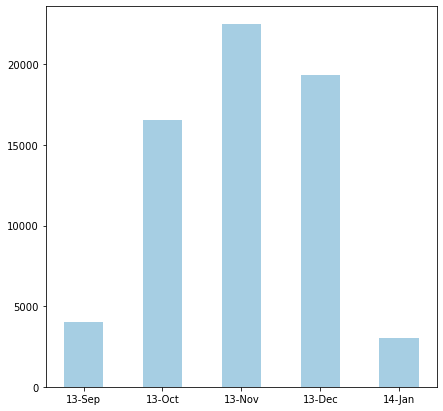

In [33]:
df6 = df1.groupby(['Year_Month']).count().reindex(index=['13-Sep', '13-Oct', '13-Nov', '13-Dec', '14-Jan'])
df1['Date']
plt.figure(figsize=(7, 7))
plt.bar(df6['Date'].index, df6['Date'].values, width=0.5)
plt.show()

### 도시별 구매건수

In [34]:
df5 = df1['State'].value_counts()
df5 = df5.reset_index().rename(columns={'index':'State', 'State':'Count'})
df5

,State,Count
0,Washington,39725
1,California,22852
2,New York,2799


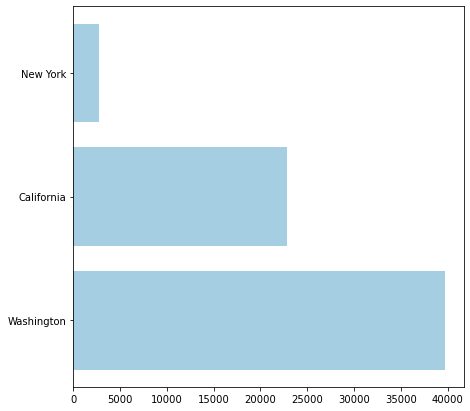

In [35]:
plt.figure(figsize=(7, 7))
plt.barh(df5['State'], df5['Count'])
plt.show()